In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

random_state= 8

In [2]:
mnist= fetch_openml("mnist_784", version= 1, as_frame= True)

In [3]:
mnist["data"].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mnist["target"].head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
# split data to x and y

X, y= mnist["data"], mnist["target"]
y= y.astype(int)

In [6]:
def plot_images(instances, images_per_row):
    """Plot multiple images at once. Code from O'Reilly book."""

    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    plt.imshow(big_image, cmap = mpl.cm.binary)
    plt.axis("off")
    plt.show()

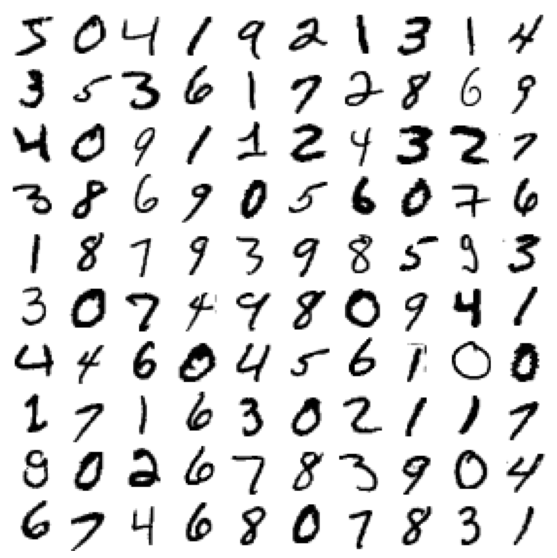

In [7]:
# look at first 100 images

instances= X[:100]
images_per_row= 10

plt.figure(figsize= (10, 10))
plot_images(instances, images_per_row)

# Train Test Split

In [8]:
len(X)

70000

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify= y, 
                                                    test_size= 0.25)

In [10]:
# check if the data is stratified correctly

print("Whole data:")
print((y.value_counts().sort_index() / y.values.sum()))

print("\nTrain set:")
print((y_train.value_counts().sort_index() / y_train.values.sum()))

Whole data:
0    0.022148
1    0.025274
2    0.022428
3    0.022912
4    0.021895
5    0.020255
6    0.022062
7    0.023400
8    0.021898
9    0.022325
Name: class, dtype: float64

Train set:
0    0.022147
1    0.025275
2    0.022425
3    0.022913
4    0.021895
5    0.020256
6    0.022062
7    0.023401
8    0.021899
9    0.022323
Name: class, dtype: float64


# Scale Data

In [11]:
from sklearn.preprocessing import RobustScaler

scaler= RobustScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Model Selection

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_score(y_true, y_pred, print_res= False):
    """Get and print accuracy, f1, percision and recall"""
    
    try:
        nunique= len(np.unique(y_true))
    except: 
        nunique= y_true.nunique()

    if nunique > 2:
        average= "weighted"
    else:
        average= "binary"

    accu= accuracy_score(y_true, y_pred)
    f1= f1_score(y_true, y_pred, average= average)
    prec= precision_score(y_true, y_pred, average= average)
    rec= recall_score(y_true, y_pred, average= average)

    if print_res == True:
        print("accuracy= {}".format(accu))
        print("f1= {}".format(f1))
        print("Precision= {}".format(prec))
        print("Recall= {}".format(rec))
        print("\nWhen model claims TRUE, it is correct {}% of the time (precision).".format(round(prec*100, 0)))
        print("Model detects {}% of all TRUE (recall).".format(round(rec*100, 0)))
    else:
        pass

    return accu, f1, prec, rec

In [15]:
# list all models to be tried

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = {
    "SVC": SVC(random_state= random_state),
    "KNN": KNeighborsClassifier(),
    "SGD": SGDClassifier(random_state= random_state),
    "Decision Tree": DecisionTreeClassifier(random_state= random_state),
    "Random Forest": RandomForestClassifier(random_state= random_state),
    "GB": GradientBoostingClassifier(random_state= random_state),
    "Adaboost": AdaBoostClassifier(random_state= random_state)
}

In [16]:
# # cross val the models, append result to result df

# from sklearn.model_selection import cross_val_predict

# df_result= pd.DataFrame(columns = ['Model', 'Accuracy', "f1", 'Precision', 'Recall'])

# for key, classifier in classifiers.items():
#     y_train_pred= cross_val_predict(classifier, X_train_scaled, y_train, cv= 3)
#     model_name= classifier.__class__.__name__
#     accu, f1, prec, rec= get_score(y_train, y_train_pred)
#     df_result.loc[len(df_result.index)] = [model_name, accu, f1, prec, rec] 

In [17]:
# save result to csv because cross val predict took a long time

# df_result= df_result.sort_values('Accuracy', ascending= False).reset_index(drop= True)
# df_result.to_csv("output/df_result.csv", index= False)
df_result= pd.read_csv("output/df_result.csv")
df_result

,Model,Accuracy,f1,Precision,Recall
0,RandomForestClassifier,0.964286,0.964257,0.964253,0.964286
1,GradientBoostingClassifier,0.943086,0.943046,0.943057,0.943086
2,DecisionTreeClassifier,0.856590,0.856462,0.856422,0.856590
3,SGDClassifier,0.823810,0.822835,0.824379,0.823810
4,SVC,0.773371,0.772681,0.785115,0.773371
5,KNeighborsClassifier,0.740476,0.737741,0.741884,0.740476
6,AdaBoostClassifier,0.726000,0.723831,0.723419,0.726000


# Randomized Search

In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 250, num = 11)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 50, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
    }

In [19]:
# from sklearn.model_selection import RandomizedSearchCV

# base_rfc_model= RandomForestClassifier()

# rscv= RandomizedSearchCV(
#     estimator= base_rfc_model, 
#     param_distributions= param_grid, 
#     scoring= 'accuracy',
#     random_state= random_state,
#     cv= 3
#     )

# rscv.fit(X_train_scaled, y_train)

# rscv.best_params_

rscv.best_params_

{'n_estimators': 170,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

# Test Best Model on Training Set

In [20]:
best_rfc_model= RandomForestClassifier(
    n_estimators= 170,
    max_features= "sqrt",
    max_depth= 40,
    min_samples_split= 3,
    min_samples_leaf= 2,
    bootstrap= False
)

In [21]:
# use best model with cv to predict y_train

from sklearn.model_selection import cross_val_predict

y_train_pred= cross_val_predict(best_rfc_model, X_train_scaled, y_train, cv= 3)

In [22]:
print(best_rfc_model.__class__.__name__, "\n")
get_score(y_train, y_train_pred, print_res= True)

RandomForestClassifier 

accuracy= 0.9678095238095238
f1= 0.9677931206780648
Precision= 0.967803942687132
Recall= 0.9678095238095238

When model claims TRUE, it is correct 97.0% of the time (precision).
Model detects 97.0% of all TRUE (recall).


(0.9678095238095238, 0.9677931206780648, 0.967803942687132, 0.9678095238095238)

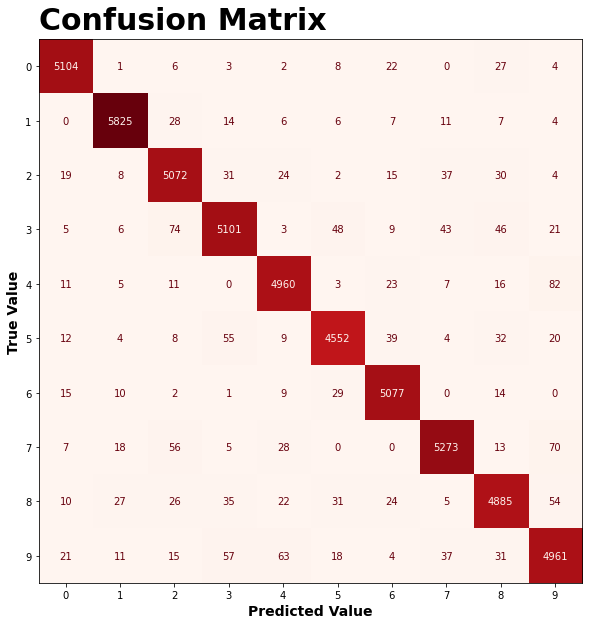

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))

cm= confusion_matrix(y_train, y_train_pred)
disp= ConfusionMatrixDisplay(cm)
disp.plot(ax= ax, cmap= plt.cm.Reds, colorbar= False)

plt.title("Confusion Matrix", loc= "left", pad= 10, fontsize= 30, fontweight= "bold")
plt.xlabel("Predicted Value", fontweight= "bold", fontsize= 14)
plt.ylabel("True Value", fontweight= "bold", fontsize= 14)

plt.show()

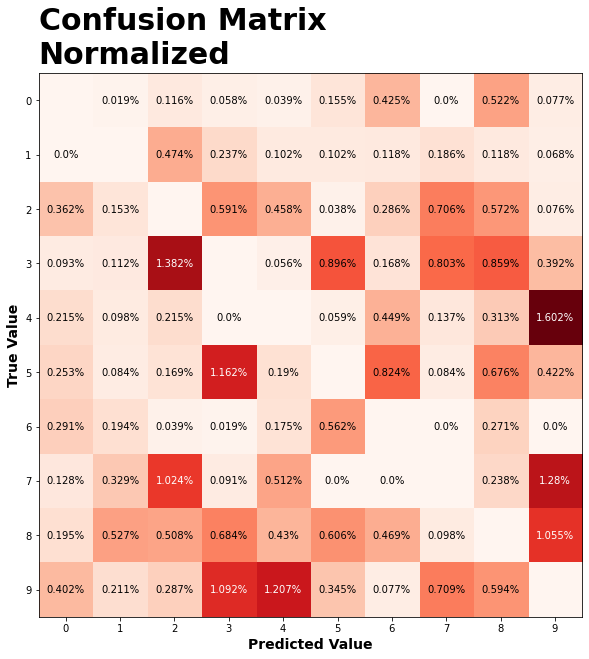

In [24]:
row_sum= cm.sum(axis= 1, keepdims= True) # count of each number 
row_sum

cm_norm= cm / row_sum
cm_norm= np.round(cm_norm * 100, 3)
np.fill_diagonal(cm_norm, 0)

fig, ax = plt.subplots(figsize=(10,10))

ax.matshow(cm_norm, cmap= plt.cm.Reds)

# annotate
for i in list(range(y.nunique())):
    for j in list(range(y.nunique())):
       
        if cm_norm[i, j] > 1:
            color= "white"
        else:
            color= "black"
        
        if i == j: 
            pass
        else:
           text = ax.text(j, i, s= cm_norm[i, j].astype(str) + "%", ha="center", va="center", color= color)

ax.set_yticks(list(range(y.nunique())))
ax.set_xticks(list(range(y.nunique())))
ax.xaxis.set_ticks_position("bottom")

plt.title("Confusion Matrix\nNormalized", loc= "left", pad= 10, fontsize= 30, fontweight= "bold")
plt.xlabel("Predicted Value", fontweight= "bold", fontsize= 14)
plt.ylabel("True Value", fontweight= "bold", fontsize= 14)

plt.show()

# Data Augmentation

In [25]:
X_train= X_train.to_numpy()

## Shift Image

In [26]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    """Shift image. Code from O'Reilly"""
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

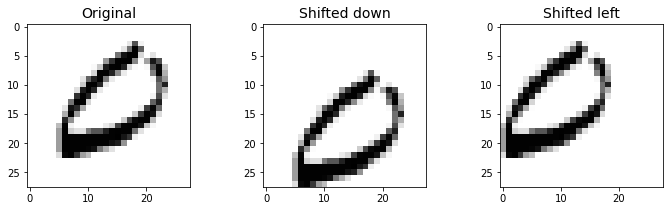

In [27]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [28]:
# shift image, append to df

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [29]:
# len X_train before x 5
len(X_train) * 5

262500

In [30]:
# len after augmented
len(X_train_augmented)

262500

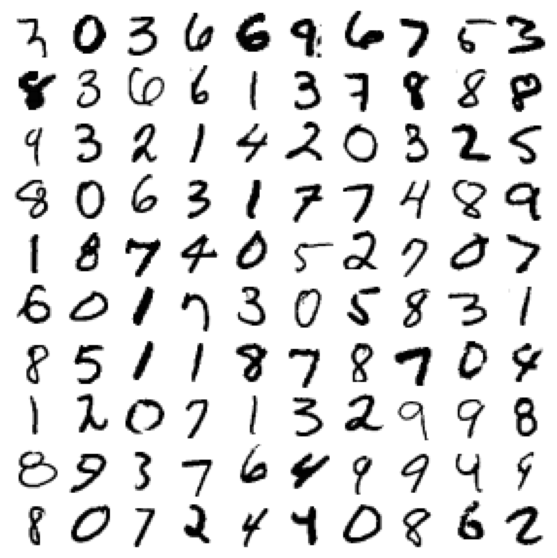

In [31]:
# look at first 100 images

instances= X_train_augmented[:100]
images_per_row= 10

plt.figure(figsize= (10, 10))
plot_images(instances, images_per_row)

## Rotate Image

In [32]:
# from scipy.ndimage import rotate

# def rotate_image(image, angle):
#     """Rotate image"""
#     image = image.reshape((28, 28))
#     rotated_image = rotate(image, angle, reshape= False)
#     return rotated_image.reshape([-1])

In [33]:
# image = X_train_augmented[1000]
# shifted_image_down = rotate_image(image, 10)
# shifted_image_left = rotate_image(image, -10)

# plt.figure(figsize=(12,3))
# plt.subplot(131)
# plt.title("Original", fontsize=14)
# plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.subplot(132)
# plt.title("Rotated 10 degree\ncounterclockwise", fontsize=14)
# plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.subplot(133)
# plt.title("Rotated 10 degree\nclockwise", fontsize=14)
# plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.show()

In [34]:
# # rotate image, append to df

# X_train_augmented_2 = [image for image in X_train_augmented]
# y_train_augmented_2 = [label for label in y_train_augmented]

# angles= [10, -10]
# for angle in angles:
#     for image, label in zip(X_train_augmented, y_train_augmented):
#         X_train_augmented_2.append(rotate(image.reshape(28, 28), angle))
#         y_train_augmented_2.append(label)

In [35]:
# # look at first 100 images

# instances= X_train_augmented_2[:100]
# images_per_row= 10

# plt.figure(figsize= (10, 10))
# plot_images(instances, images_per_row)

## Rescale the Image

In [36]:
scaler = RobustScaler()

X_train_scaled_2 = scaler.fit_transform(X_train_augmented.reshape(-1, X_train_augmented.shape[-1])).reshape(X_train_augmented.shape)

In [37]:
X_test_scaled_2 = scaler.transform(X_test) 

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


# Test Best Model on Training Set

In [38]:
y_train_pred= cross_val_predict(best_rfc_model, X_train_augmented, y_train_augmented, cv= 3)

In [47]:
len(np.unique(y_train_augmented))

10

In [50]:
print(best_rfc_model.__class__.__name__, "\n")
get_score(y_train_augmented, y_train_pred, print_res= True)

RandomForestClassifier 

accuracy= 0.9686590476190476
f1= 0.968639740938909
Precision= 0.9686931871148245
Recall= 0.9686590476190476

When model claims TRUE, it is correct 97.0% of the time (precision).
Model detects 97.0% of all TRUE (recall).


(0.9686590476190476, 0.968639740938909, 0.9686931871148245, 0.9686590476190476)

# Fit Model with Training Data

In [51]:
best_rfc_model.fit(X_train_augmented, y_train_augmented)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=170)

# Predict Test Set

In [52]:
y_test_pred= best_rfc_model.predict(X_test)

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [53]:
print(best_rfc_model.__class__.__name__, "\n")
get_score(y_test_pred, y_test, print_res= True)

RandomForestClassifier 

accuracy= 0.9821142857142857
f1= 0.982116241209821
Precision= 0.9821419166131964
Recall= 0.9821142857142857

When model claims TRUE, it is correct 98.0% of the time (precision).
Model detects 98.0% of all TRUE (recall).


(0.9821142857142857, 0.982116241209821, 0.9821419166131964, 0.9821142857142857)

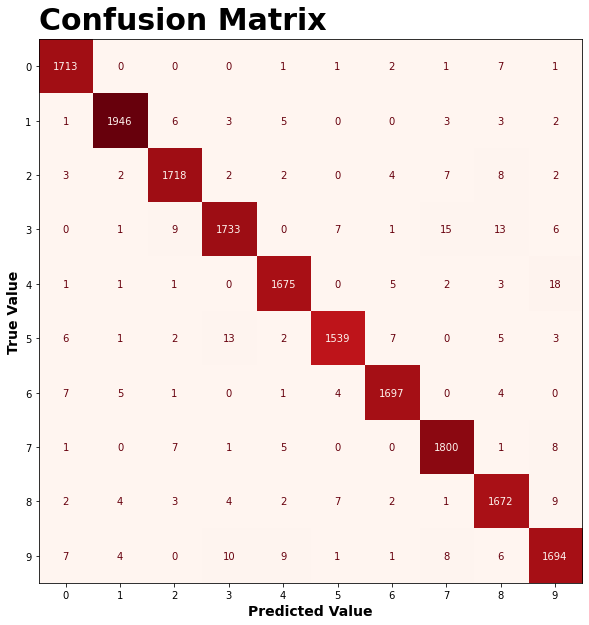

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))

cm= confusion_matrix(y_test, y_test_pred)
disp= ConfusionMatrixDisplay(cm)
disp.plot(ax= ax, cmap= plt.cm.Reds, colorbar= False)

plt.title("Confusion Matrix", loc= "left", pad= 10, fontsize= 30, fontweight= "bold")
plt.xlabel("Predicted Value", fontweight= "bold", fontsize= 14)
plt.ylabel("True Value", fontweight= "bold", fontsize= 14)

plt.show()

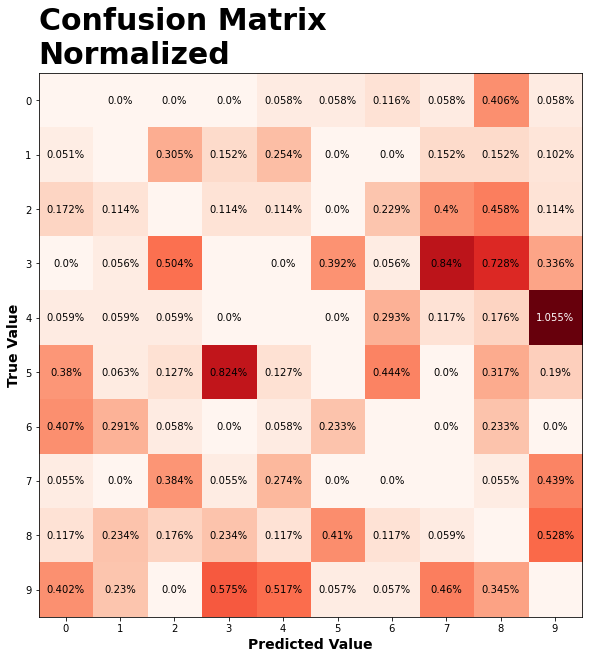

In [55]:
row_sum= cm.sum(axis= 1, keepdims= True) # count of each number 
row_sum

cm_norm= cm / row_sum
cm_norm= np.round(cm_norm * 100, 3)
np.fill_diagonal(cm_norm, 0)

fig, ax = plt.subplots(figsize=(10,10))

ax.matshow(cm_norm, cmap= plt.cm.Reds)

# annotate
for i in list(range(y.nunique())):
    for j in list(range(y.nunique())):
       
        if cm_norm[i, j] > 1:
            color= "white"
        else:
            color= "black"
        
        if i == j: 
            pass
        else:
           text = ax.text(j, i, s= cm_norm[i, j].astype(str) + "%", ha="center", va="center", color= color)

ax.set_yticks(list(range(y.nunique())))
ax.set_xticks(list(range(y.nunique())))
ax.xaxis.set_ticks_position("bottom")

plt.title("Confusion Matrix\nNormalized", loc= "left", pad= 10, fontsize= 30, fontweight= "bold")
plt.xlabel("Predicted Value", fontweight= "bold", fontsize= 14)
plt.ylabel("True Value", fontweight= "bold", fontsize= 14)

plt.show()

# Visualize the Prediction

In [56]:
pred= best_rfc_model.predict(X_test[:100])
pred

c:\Users\Anjelito\miniconda3\envs\data_science\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([5, 2, 1, 9, 7, 1, 8, 6, 4, 3, 2, 2, 8, 8, 8, 2, 9, 0, 0, 0, 9, 2,
       2, 3, 8, 6, 4, 8, 4, 0, 7, 7, 8, 6, 2, 0, 4, 2, 0, 2, 2, 9, 4, 4,
       4, 7, 3, 4, 7, 4, 6, 3, 2, 4, 7, 9, 9, 5, 0, 8, 0, 7, 5, 4, 7, 1,
       3, 4, 8, 4, 0, 2, 1, 9, 4, 7, 6, 6, 7, 8, 7, 3, 3, 1, 0, 1, 6, 0,
       8, 0, 8, 0, 2, 5, 8, 6, 7, 4, 4, 3])

In [57]:
# import time

# images_and_labels = list(zip(X_test[:100].to_numpy().reshape(100, 28, 28), pred))

# # time.sleep(1)
# for index, (image, label) in enumerate(images_and_labels[0:10]):
#     plt.figure(figsize=(5,5))
#     plt.axis('off')
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     plt.text(5, 5, s= '%i' % label, size=50, 
#          ha="center", va="center",
#          bbox=dict(boxstyle="square",
#                    ec=(1., 0.5, 0.5),
#                    fc=(1., 0.8, 0.8),
#                    )
#          )
#     plt.pause(1)

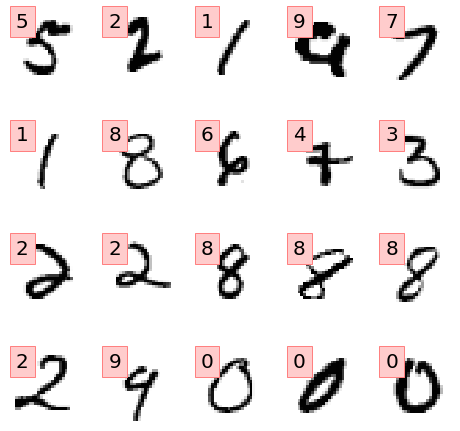

In [65]:
import time

images_and_labels = list(zip(X_test[:100].to_numpy().reshape(100, 28, 28), pred))

plt.figure(figsize=(8,8))

for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(4, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.text(5, 5, s= '%i' % label, size=20, 
         ha="center", va="center",
         bbox=dict(boxstyle="square",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
         )